In [1]:
import numpy as np
from utils import *
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import pandas as pd
import seaborn as sns


2023-01-26 01:09:44.253423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 01:09:44.359522: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 01:09:44.824716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/venom/lib/:/usr/local/cuda/lib64::/usr/local/tensorrt/lib/
2023-01-26 01:09:44.82

In [2]:
# Load training data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Print info on the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Define the network
layers = [
  ConvolutionLayer(16,3), # layer with 16 3x3 filters, output (26,26,16)
  MaxPoolingLayer(2), # pooling layer 2x2, output (13,13,16)
  SoftmaxLayer(13*13*16, 10) # softmax layer with 13*13*16 input and 10 output
  ]

In [5]:
for epoch in range(1):
  print('Epoch {} ->'.format(epoch+1))
  # Shuffle training data
  permutation = np.random.permutation(len(X_train))
  X_train = X_train[permutation]
  y_train = y_train[permutation]
  # Training the CNN
  loss = 0
  accuracy = 0
  for i, (image, label) in enumerate(zip(X_train, y_train)):
    if i % 1000 == 999:  # Every 1000 examples
      print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(i+1, loss/1000, accuracy/10))
      loss = 0
      accuracy = 0
    loss_1, accuracy_1 = CNN_training(image, label, layers)
    loss += loss_1
    accuracy += accuracy_1

Epoch 1 ->
Step 1000. For the last 1000 steps: average loss 0.8110952470686863, accuracy 75.0
Step 2000. For the last 1000 steps: average loss 0.4688279029718267, accuracy 85.3
Step 3000. For the last 1000 steps: average loss 0.43521389302148383, accuracy 86.3
Step 4000. For the last 1000 steps: average loss 0.429510016555148, accuracy 87.1
Step 5000. For the last 1000 steps: average loss 0.3331780271015701, accuracy 90.8
Step 6000. For the last 1000 steps: average loss 0.3729835740207727, accuracy 89.7
Step 7000. For the last 1000 steps: average loss 0.40293171536407824, accuracy 87.7
Step 8000. For the last 1000 steps: average loss 0.3127635899154598, accuracy 90.5
Step 9000. For the last 1000 steps: average loss 0.3295176524341133, accuracy 90.4
Step 10000. For the last 1000 steps: average loss 0.3494092344038905, accuracy 89.4
Step 11000. For the last 1000 steps: average loss 0.3707528927478928, accuracy 90.0
Step 12000. For the last 1000 steps: average loss 0.3449288537009204, acc

In [6]:
# Test the CNN
output_labels = []
loss = 0
accuracy = 0
for i, (image, label) in enumerate(zip(X_test, y_test)):
    if i % 1000 == 999: # Every 100 examples
        print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(i+1, loss/1000, accuracy/10))
        loss = 0
        accuracy = 0
    output, loss_1, accuracy_1 = CNN_forward(image, label, layers)
    loss += loss_1
    accuracy += accuracy_1
    output_labels.append(np.argmax(output))

Step 1000. For the last 1000 steps: average loss 0.19712009027073032, accuracy 93.3
Step 2000. For the last 1000 steps: average loss 0.286415287715243, accuracy 91.2
Step 3000. For the last 1000 steps: average loss 0.25250954947609006, accuracy 92.3
Step 4000. For the last 1000 steps: average loss 0.23797447988993864, accuracy 92.7
Step 5000. For the last 1000 steps: average loss 0.24060947015322223, accuracy 93.3
Step 6000. For the last 1000 steps: average loss 0.12302906817720441, accuracy 96.8
Step 7000. For the last 1000 steps: average loss 0.1727259832338689, accuracy 95.0
Step 8000. For the last 1000 steps: average loss 0.1271702276681902, accuracy 97.0
Step 9000. For the last 1000 steps: average loss 0.07254330962987215, accuracy 97.9
Step 10000. For the last 1000 steps: average loss 0.19359261675894632, accuracy 94.2


In [7]:
metrics = pd.DataFrame(
    index=['accuracy', 'precision', 'recall', 'f1'], columns=['Metrics'])
metrics.loc['accuracy'] = accuracy_score(y_test, output_labels)
metrics.loc['precision'] = precision_score(y_test, output_labels, average='weighted')
metrics.loc['recall'] = recall_score(y_test, output_labels, average='weighted')
metrics.loc['f1'] = f1_score(y_test, output_labels, average='weighted')
metrics


,Metrics
accuracy,0.9438
precision,0.944554
recall,0.9438
f1,0.943619


Text(159.0, 0.5, 'Truth')

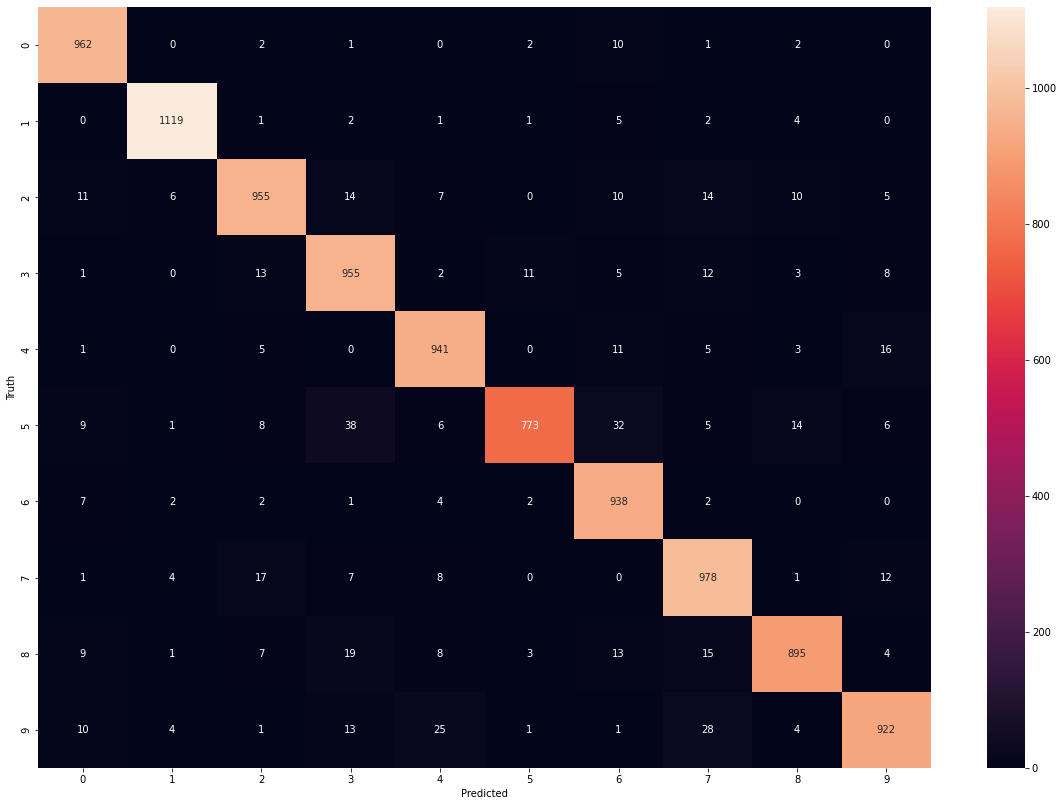

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot confusion matrix
cm = confusion_matrix(y_test, output_labels)
plt.figure(figsize=(20, 14))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# CIFAR-10

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# convert to grayscale
X_train = np.mean(X_train, axis=3)
X_test = np.mean(X_test, axis=3)


In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [ ]:
# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [11]:
layers = [
    ConvolutionLayer(16, 3),  # layer with 16 3x3 filters, output (30,30,16)
    MaxPoolingLayer(2),  # pooling layer 2x2, output (15,15,16)
    # softmax layer with 15*15*16 input and 10 output
    SoftmaxLayer(15*15*16, 10)
]


In [12]:
for epoch in range(1):
  print('Epoch {} ->'.format(epoch+1))
  # Shuffle training data
  permutation = np.random.permutation(len(X_train))
  X_train = X_train[permutation]
  y_train = y_train[permutation]
  # Training the CNN
  loss = 0
  accuracy = 0
  for i, (image, label) in enumerate(zip(X_train, y_train)):
    if i % 1000 == 999:  # Every 1000 examples
      print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(
          i+1, loss/1000, accuracy/10))
      loss = 0
      accuracy = 0
    loss_1, accuracy_1 = CNN_training(image, label, layers)
    loss += loss_1
    accuracy += accuracy_1


Epoch 1 ->
Step 1000. For the last 1000 steps: average loss [2.333238], accuracy 18.1
Step 2000. For the last 1000 steps: average loss [2.08863711], accuracy 24.1
Step 3000. For the last 1000 steps: average loss [2.06732268], accuracy 24.7
Step 4000. For the last 1000 steps: average loss [2.0636058], accuracy 26.8
Step 5000. For the last 1000 steps: average loss [2.10181395], accuracy 25.6
Step 6000. For the last 1000 steps: average loss [2.07629208], accuracy 25.7
Step 7000. For the last 1000 steps: average loss [2.04549295], accuracy 30.8
Step 8000. For the last 1000 steps: average loss [2.02271753], accuracy 28.3
Step 9000. For the last 1000 steps: average loss [2.08596945], accuracy 28.4
Step 10000. For the last 1000 steps: average loss [2.17761434], accuracy 24.1
Step 11000. For the last 1000 steps: average loss [2.24162389], accuracy 26.6
Step 12000. For the last 1000 steps: average loss [2.2610369], accuracy 24.7
Step 13000. For the last 1000 steps: average loss [2.22076179], ac

In [13]:
# Test the CNN
output_labels = []
loss = 0
accuracy = 0
for i, (image, label) in enumerate(zip(X_test, y_test)):
    if i % 1000 == 999: # Every 100 examples
        print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(i+1, loss/1000, accuracy/10))
        loss = 0
        accuracy = 0
    output, loss_1, accuracy_1 = CNN_forward(image, label, layers)
    loss += loss_1
    accuracy += accuracy_1
    output_labels.append(np.argmax(output))

Step 1000. For the last 1000 steps: average loss [6.49565331], accuracy 18.6
Step 2000. For the last 1000 steps: average loss [6.47090441], accuracy 18.2
Step 3000. For the last 1000 steps: average loss [6.59916284], accuracy 17.0
Step 4000. For the last 1000 steps: average loss [6.51554874], accuracy 16.5
Step 5000. For the last 1000 steps: average loss [6.46951619], accuracy 17.9
Step 6000. For the last 1000 steps: average loss [6.71537256], accuracy 14.3
Step 7000. For the last 1000 steps: average loss [6.62009309], accuracy 16.7
Step 8000. For the last 1000 steps: average loss [6.511097], accuracy 16.3
Step 9000. For the last 1000 steps: average loss [6.23707656], accuracy 19.0
Step 10000. For the last 1000 steps: average loss [6.62423014], accuracy 16.7


In [14]:
metrics = pd.DataFrame(
    index=['accuracy', 'precision', 'recall', 'f1'], columns=['Metrics'])
metrics.loc['accuracy'] = accuracy_score(y_test, output_labels)
metrics.loc['precision'] = precision_score(
    y_test, output_labels, average='weighted')
metrics.loc['recall'] = recall_score(y_test, output_labels, average='weighted')
metrics.loc['f1'] = f1_score(y_test, output_labels, average='weighted')
metrics


/home/venom/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Metrics
accuracy,0.1712
precision,0.350828
recall,0.1712
f1,0.095026


Text(159.0, 0.5, 'Truth')

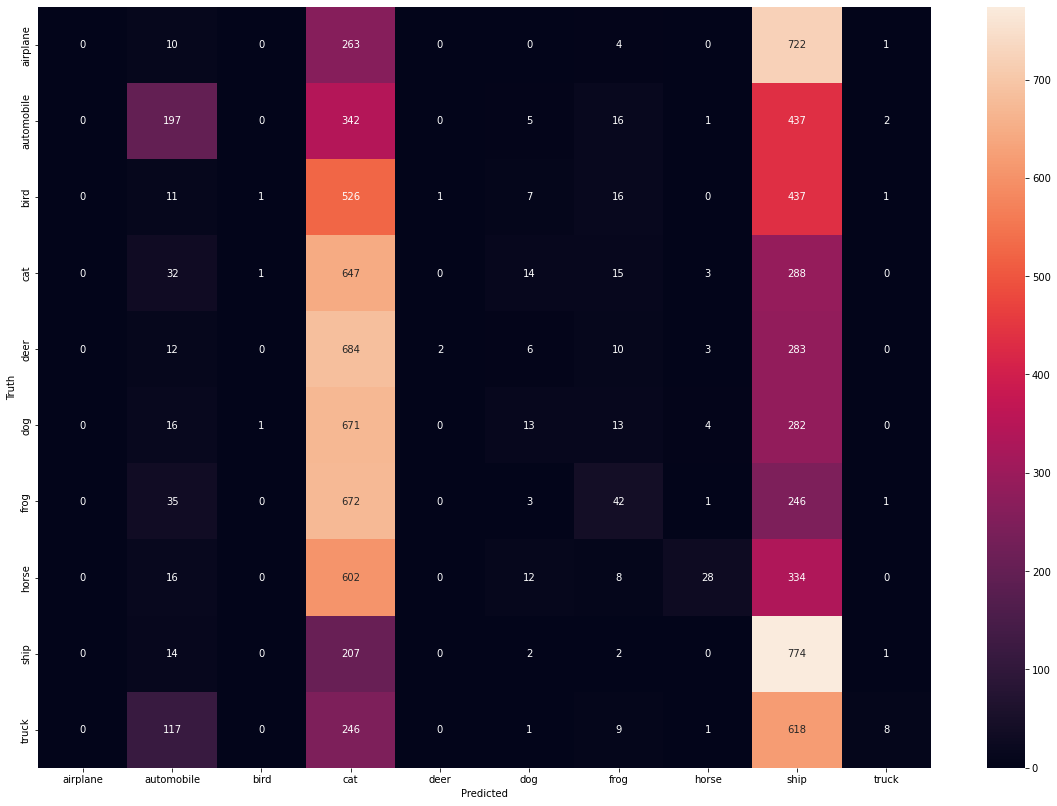

In [15]:
# plot confusion matrix, take classes from cifar10
cm = confusion_matrix(y_test, output_labels)
cm = pd.DataFrame(cm, index=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], columns=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.figure(figsize=(20,14))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')